In [38]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

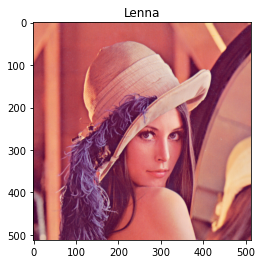

In [39]:
image_path = "Images/Lenna.png"
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Lenna")
plt.show()

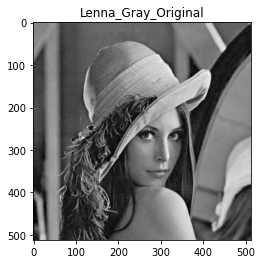

In [40]:
gray_image = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.title("Lenna_Gray_Original")
plt.show()

### Prewitt filter for sharpening

In [41]:
prewitt_kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

In [42]:
def convolve(image, kernel):
    m, n = kernel.shape
    h, w = image.shape
    y, x = h - (m - 1), w - (n - 1)
    new_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            new_image[i, j] = np.sum(image[i:i+m, j:j+n] * kernel)
    return new_image


In [43]:
sharpened_x = convolve(gray_image, prewitt_kernel_x)
sharpened_y = convolve(gray_image, prewitt_kernel_y)


grad_magnitude = np.sqrt(sharpened_x**2 + sharpened_y**2)


In [44]:
T = 50  # thresholding
edge_image = np.zeros_like(grad_magnitude)
edge_image[grad_magnitude > T] = 1

# padding for having same shape
edge_image = np.pad(edge_image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

In [45]:
#  Implement the equation g(x,y) = f(x,y) + c * e(x,y)

c = 1 
output_image = gray_image + c * edge_image
output_image = np.clip(output_image, 0, 255)

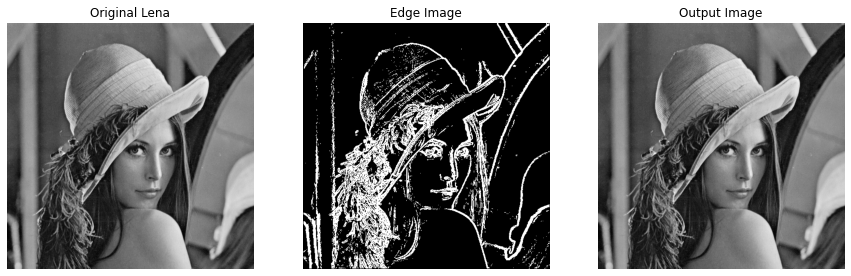

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Lena')
axes[0].axis('off')

axes[1].imshow(edge_image, cmap='gray')
axes[1].set_title('Edge Image')
axes[1].axis('off')

axes[2].imshow(output_image, cmap='gray')
axes[2].set_title('Output Image')
axes[2].axis('off')

plt.show()